##**Практическая работа №1**

In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd             
import seaborn as sns           
import sklearn                  

# **Обзор уровня самоубийств с 1985 по 2016 год**

В наборе данных собрана информация для выявления факторов коррелирующих с повышением уровня самоубийств среди различных групп по всему миру. 

#**Загружаем данные**

Таблица содержит данные о более 27800 группах самоубийц. Для каждой группы указан год, страна, возрастной диапазон, пол, поколение, количество самоубийств данной группы в конкретный год, общее количество людей данного возрастного диапазона в конкретный год, количество самоубийц на 100 тысяч населения, уровни абсолютного и подушевого ВВП, индекс человеческого развития.

Необходимо определить к какому поколению относится группа самоубийц.

In [2]:
url="https://raw.githubusercontent.com/pp3000/Machine-Learning/master/master.csv"
data = pd.read_csv(url)

Посмотрим на размер таблицы

In [3]:
data.shape

(27820, 12)

Выведем первые 5 строк таблицы

In [4]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Выведем последние 5 строк таблицы

In [5]:
data.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


Выведем имена признаков(столбцов)

In [6]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

Каждый признак имеет своё имя:
- `country` - страна
- `year` - год
- `sex` - пол возратсной группы
- `age` - возрастная группа
- `suicides_no` - количество самоубийств группы
- `population` - количество населения данной группы
- `suicides/100k pop` - количество самоубийств на 100 тысяч человек
- `country-year` - год и страна
- `HDI for year` - индекс человеческого развития
- ` gdp_for_year ($) ` - ВВП 
- `gdp_per_capita ($)` - ВВП на душу населения
- `generation` - поколение


Признаки `country`, `sex`, `country-year`, `age`,`generation` - категориальные

Признаки `year`, `suicides_no`, `population`, `suicides/100k pop`, `HDI for year`, ` gdp_for_year ($) `, `gdp_per_capita ($)` - числовые

In [7]:
data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

Все категориалные признаки, имеющие тип `'Object'` переведём в спеиальный тип, предназначенный для хранения категориальных значений

In [8]:
for item in ['country', 'age','sex', 'country-year', 'generation']:
  data[item] = data[item].astype('category');

Признак ` gdp_for_year ($) ` числовой, но имеет тип `'Object'`. Так же в записи присутствуют запятые. Поэтому для признака ` gdp_for_year ($) ` уберём запятые и заменим тип на `float`

In [9]:
data[' gdp_for_year ($) ']=data[' gdp_for_year ($) '].str.replace(',','').astype(float)

In [10]:
data[' gdp_for_year ($) ']

0        2.156625e+09
1        2.156625e+09
2        2.156625e+09
3        2.156625e+09
4        2.156625e+09
             ...     
27815    6.306708e+10
27816    6.306708e+10
27817    6.306708e+10
27818    6.306708e+10
27819    6.306708e+10
Name:  gdp_for_year ($) , Length: 27820, dtype: float64

In [11]:
data.dtypes

country               category
year                     int64
sex                   category
age                   category
suicides_no              int64
population               int64
suicides/100k pop      float64
country-year          category
HDI for year           float64
 gdp_for_year ($)      float64
gdp_per_capita ($)       int64
generation            category
dtype: object

#**Боремся с выбросами**

Если взять статистику, то наибольшее количество суицидов на 100 тысяч населения будет в бедных странах, либо в странах периферийного капитализма, т.е. тоже в не богатых. Критерием, выявляющим такие страны является ВВП на душу населения. Построим диаграмму рассеивания для признаков `gdp_per_capita ($)` и `suicides_no`

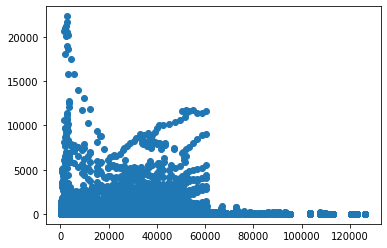

In [12]:
plt.scatter(x='gdp_per_capita ($)', y='suicides_no', data=data)
pass

Из диаграммы видно, что в странах с большим подушевым ВВП самоубийств очень мало. В странах с маленьким ВВП на душу населения ситуация обратная. 20 тысяч самоубийств это довольно много, но не нереально, во времена войн и различных трагических событий(например государственного террора направленного против своих граждан), цифра достижима. Но всё же, наряду с очень низкими показателями самоубийств в странах с высоким уровнем подушевого ВВП, будем считать их за выбросы.

Для обнаружения выбросов найдём квантили для признаков `gdp_per_capita ($)` и `suicides_no`

In [13]:
data['suicides_no'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       0.000
0.010       0.000
0.050       0.000
0.100       0.000
0.500      25.000
0.900     496.000
0.950    1050.050
0.990    3993.670
0.995    6325.115
Name: suicides_no, dtype: float64

In [14]:
data['gdp_per_capita ($)'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       426.0
0.010       476.0
0.050       935.0
0.100      1524.0
0.500      9372.0
0.900     43487.0
0.950     54294.0
0.990     89634.0
0.995    107430.0
Name: gdp_per_capita ($), dtype: float64

Удалим все строки таблицы, в которых `gdp_per_capita ($)` или `suicides_no` выходят за пределы квантилей $0.005$, $0.995$

In [15]:
rows_to_drop = data[
    (data['gdp_per_capita ($)'] < data['gdp_per_capita ($)'].quantile(0.005)) | (data['gdp_per_capita ($)'] > data['gdp_per_capita ($)'].quantile(0.995)) | 
    (data['suicides_no']  < data['suicides_no' ].quantile(0.005)) | (data['suicides_no']  > data['suicides_no' ].quantile(0.995))].index
data = data.drop(rows_to_drop)
data.shape

(27416, 12)

In [16]:
rows_to_drop

Int64Index([   36,    37,    38,    39,    40,    41,    42,    43,    44,
               45,
            ...
            27161, 27162, 27173, 27174, 27185, 27186, 27197, 27198, 27209,
            27210],
           dtype='int64', length=404)

#**Визуализация и описательная статистика**

In [17]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
count,27416.000000,27416.000000,2.741600e+04,27416.000000,8231.000000,2.741600e+04,27416.000000
mean,2001.227896,196.169573,1.763770e+06,12.611183,0.775542,4.278492e+11,16442.348665
std,8.474799,540.752165,3.618902e+06,18.718327,0.092353,1.383653e+12,17661.509817
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,426.000000
25%,1995.000000,3.000000,9.803450e+04,0.900000,0.713000,9.024567e+09,3492.000000
50%,2002.000000,25.000000,4.314125e+05,5.910000,0.778000,4.755467e+10,9356.000000
75%,2008.000000,130.000000,1.472438e+06,16.330000,0.851000,2.581543e+11,24654.000000
max,2016.000000,6250.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,107430.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

По умолчанию этот метод дает информацию только о количественных признаках. Получим информацию о категориальных:

In [ ]:
data.describe(include=['category'])

,country,sex,age,country-year,generation
count,27416,27416,27416,27416,27416
unique,101,2,6,2299,6
top,Mauritius,female,75+ years,Uzbekistan2014,Generation X
freq,382,13778,4598,12,6321


Количество самоубийств по возрастным группам

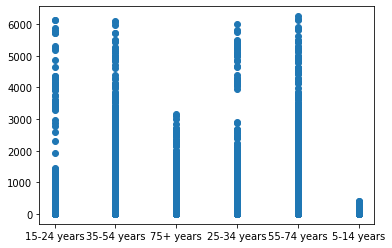

In [ ]:
plt.scatter(data['age'], data['suicides_no'])
pass

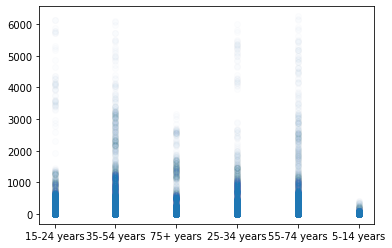

In [ ]:
plt.scatter(data['age'], data['suicides_no'], alpha=0.01)
pass

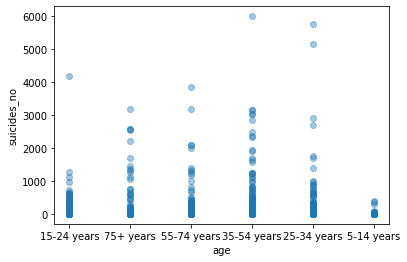

In [ ]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.scatter(data.iloc[random_subset]['age'], data.iloc[random_subset]['suicides_no'], alpha=0.4)
plt.xlabel('age')
plt.ylabel('suicides_no')
pass

Количество суицидов относительно абсолютного ВВП

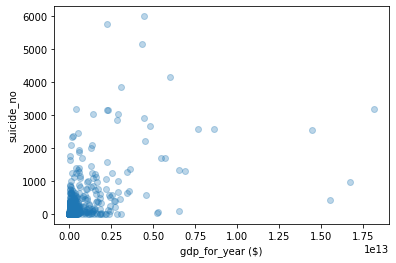

In [ ]:
plt.scatter(data.iloc[random_subset][' gdp_for_year ($) '], data.iloc[random_subset]['suicides_no'], alpha = .3)
plt.xlabel('gdp_for_year ($)')
plt.ylabel('suicide_no')
pass

Количество суициов относительно ВВП на душу населения

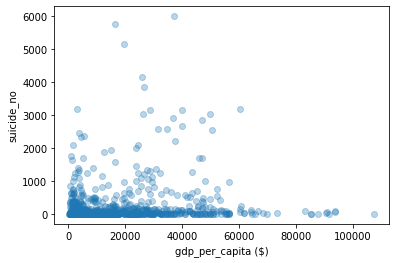

In [ ]:
plt.scatter(data.iloc[random_subset]['gdp_per_capita ($)'], data.iloc[random_subset]['suicides_no'], alpha = .3)
plt.xlabel('gdp_per_capita ($)')
plt.ylabel('suicide_no')
pass

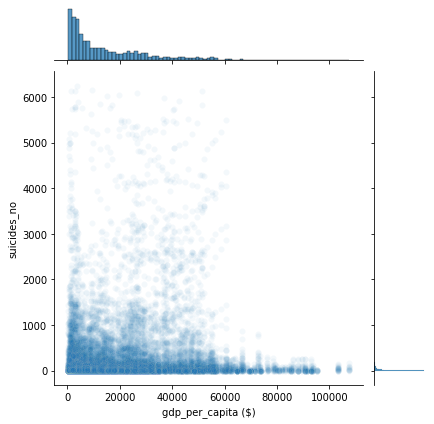

In [ ]:
sns.jointplot(x='gdp_per_capita ($)', y='suicides_no', alpha=.05, data=data)
pass

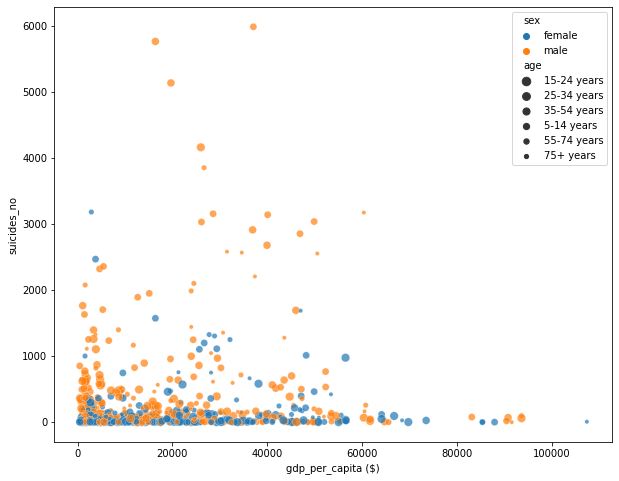

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='gdp_per_capita ($)', y='suicides_no', size='age', hue='sex', data=data.iloc[random_subset], alpha=0.7)
pass

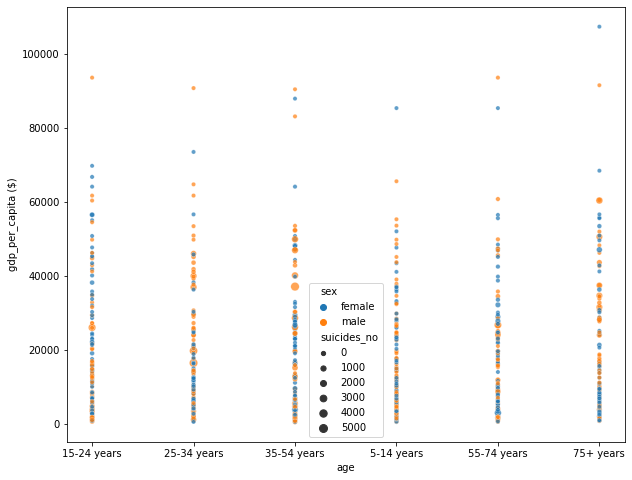

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='age', y='gdp_per_capita ($)', size='suicides_no', hue='sex', data=data.iloc[random_subset], alpha=0.7)
pass

Построим все возможные диаграммы рассеивания для каждой пары переменных

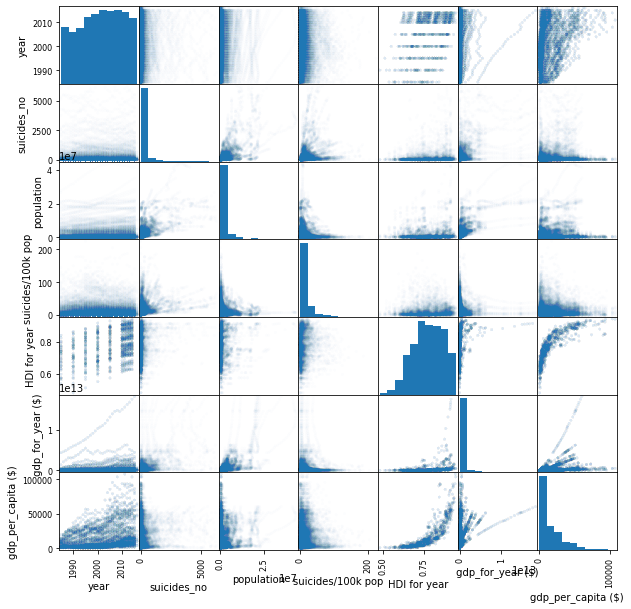

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

Ящик с усами

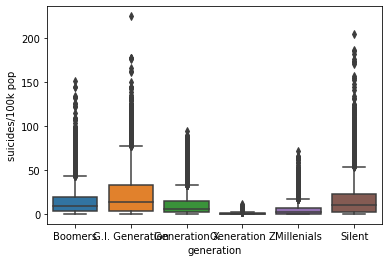

In [ ]:
sns.boxplot(x="generation", y="suicides/100k pop", data=data)
pass

Скрипичные графики

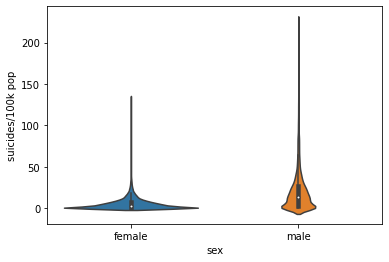

In [ ]:
sns.violinplot(x="sex", y="suicides/100k pop", data=data)
pass

Корреляционная матрица

In [18]:
corr_mat = data.corr()
corr_mat

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
year,1.000000,-0.008238,0.007628,-0.039071,0.357847,0.092477,0.331255
suicides_no,-0.008238,1.000000,0.639551,0.290962,0.152072,0.511677,0.098229
population,0.007628,0.639551,1.000000,-0.038770,0.090366,0.690636,0.085809
suicides/100k pop,-0.039071,0.290962,-0.038770,1.000000,0.074754,0.011576,0.006041
HDI for year,0.357847,0.152072,0.090366,0.074754,1.000000,0.308405,0.795308
gdp_for_year ($),0.092477,0.511677,0.690636,0.011576,0.308405,1.000000,0.325507
gdp_per_capita ($),0.331255,0.098229,0.085809,0.006041,0.795308,0.325507,1.000000


In [19]:
corr_mat > 0.5

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
year,True,False,False,False,False,False,False
suicides_no,False,True,True,False,False,True,False
population,False,True,True,False,False,True,False
suicides/100k pop,False,False,False,True,False,False,False
HDI for year,False,False,False,False,True,False,True
gdp_for_year ($),False,True,True,False,False,True,False
gdp_per_capita ($),False,False,False,False,True,False,True


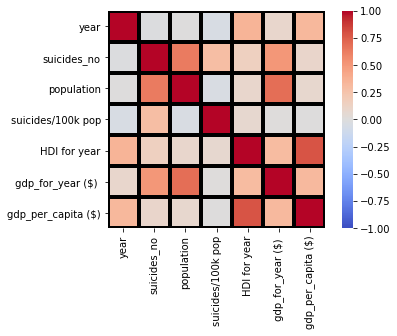

In [34]:
sns.heatmap(corr_mat,  vmin=-1, vmax=1, center= 0, linewidths=3, linecolor='black', square=True, cmap='coolwarm')
pass

Видна очевидная корреляция между индексом человеческого развития и подушевым ВВП. И вполне ожидаемая корреляция между количетвом населения и количеством суицидов.

Диаграмма количества самоубийств по поколениям

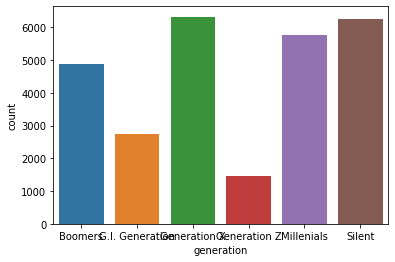

In [ ]:
sns.countplot(x='generation', data=data)
pass

## **Заполнение пропущенных значений**

In [35]:
data.dtypes

country               category
year                     int64
sex                   category
age                   category
suicides_no              int64
population               int64
suicides/100k pop      float64
country-year          category
HDI for year           float64
 gdp_for_year ($)      float64
gdp_per_capita ($)       int64
generation            category
dtype: object

In [36]:
data.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19185
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [37]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

In [38]:
data.isna().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [39]:
data.shape

(27416, 12)

In [40]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
count,27416.000000,27416.000000,2.741600e+04,27416.000000,27416.000000,2.741600e+04,27416.000000
mean,2001.227896,196.169573,1.763770e+06,12.611183,0.777262,4.278492e+11,16442.348665
std,8.474799,540.752165,3.618902e+06,18.718327,0.050613,1.383653e+12,17661.509817
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,426.000000
25%,1995.000000,3.000000,9.803450e+04,0.900000,0.778000,9.024567e+09,3492.000000
50%,2002.000000,25.000000,4.314125e+05,5.910000,0.778000,4.755467e+10,9356.000000
75%,2008.000000,130.000000,1.472438e+06,16.330000,0.778000,2.581543e+11,24654.000000
max,2016.000000,6250.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,107430.000000


In [41]:
data.describe(include=['category'])

,country,sex,age,country-year,generation
count,27416,27416,27416,27416,27416
unique,101,2,6,2299,6
top,Mauritius,female,75+ years,Uzbekistan2014,Generation X
freq,382,13778,4598,12,6321


#**Векторизация**

In [42]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'category']
print('categorical_columns=', categorical_columns)
print('numerical_columns=', numerical_columns)

categorical_columns= ['country', 'sex', 'age', 'country-year', 'generation']
numerical_columns= ['year', 'suicides_no', 'population', 'suicides/100k pop', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)']


Не будем бинаризировать целевой признак `generation`

In [43]:
categorical_columns_exept_generation= ['country', 'sex', 'age', 'country-year']

In [44]:
data_describe = data.describe(include=['category'])
binary_columns    = [c for c in categorical_columns_exept_generation if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns_exept_generation if data_describe[c]['unique'] > 2]
print('binary_columns=', binary_columns)
print('nonbinary_columns=', nonbinary_columns)

binary_columns= ['sex']
nonbinary_columns= ['country', 'age', 'country-year']


Бинарный признак `sex` заменим на числовой

In [45]:
data['sex'] = pd.factorize(data['sex'])[0]

Применим метод бинаризации (one-hot encoding)

In [46]:
data_categorical = pd.get_dummies(data[nonbinary_columns])
print(data_categorical.columns)

Index(['country_Albania', 'country_Antigua and Barbuda', 'country_Argentina',
       'country_Armenia', 'country_Aruba', 'country_Australia',
       'country_Austria', 'country_Azerbaijan', 'country_Bahamas',
       'country_Bahrain',
       ...
       'country-year_Uzbekistan2002', 'country-year_Uzbekistan2003',
       'country-year_Uzbekistan2004', 'country-year_Uzbekistan2005',
       'country-year_Uzbekistan2009', 'country-year_Uzbekistan2010',
       'country-year_Uzbekistan2011', 'country-year_Uzbekistan2012',
       'country-year_Uzbekistan2013', 'country-year_Uzbekistan2014'],
      dtype='object', length=2428)


#**Нормализация**

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению.

In [47]:
numerical_columns=['year', 'population', 'suicides/100k pop', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)','suicides_no']

In [48]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,year,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),suicides_no
count,27416.000000,2.741600e+04,27416.000000,27416.000000,2.741600e+04,27416.000000,27416.000000
mean,2001.227896,1.763770e+06,12.611183,0.777262,4.278492e+11,16442.348665,196.169573
std,8.474799,3.618902e+06,18.718327,0.050613,1.383653e+12,17661.509817,540.752165
min,1985.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,426.000000,0.000000
25%,1995.000000,9.803450e+04,0.900000,0.778000,9.024567e+09,3492.000000,3.000000
50%,2002.000000,4.314125e+05,5.910000,0.778000,4.755467e+10,9356.000000,25.000000
75%,2008.000000,1.472438e+06,16.330000,0.778000,2.581543e+11,24654.000000,130.000000
max,2016.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,107430.000000,6250.000000


In [49]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [50]:
data_numerical.describe()

,year,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),suicides_no
count,2.741600e+04,2.741600e+04,2.741600e+04,2.741600e+04,2.741600e+04,2.741600e+04,2.741600e+04
mean,1.771546e-15,7.014848e-16,-2.764964e-15,3.119815e-12,3.536386e-16,3.187720e-16,4.840094e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.914841e+00,-4.873004e-01,-6.737345e-01,-5.813930e+00,-3.091833e-01,-9.068505e-01,-3.627717e-01
25%,-7.348724e-01,-4.602876e-01,-6.256533e-01,1.457754e-02,-3.026949e-01,-7.332526e-01,-3.572239e-01
50%,9.110586e-02,-3.681663e-01,-3.580012e-01,1.457754e-02,-2.748482e-01,-4.012312e-01,-3.165398e-01
75%,7.990873e-01,-8.050287e-02,1.986725e-01,1.457754e-02,-1.226427e-01,4.649462e-01,-1.223658e-01
max,1.743062e+00,1.161718e+01,1.134497e+01,3.294348e+00,1.278707e+01,5.151748e+00,1.119520e+01


##**Соединяем всё в одну таблицу**

In [51]:
data = pd.concat((data['generation'], data_numerical, data_categorical), axis = 1)
print(data.shape)

(27416, 2436)


In [52]:
data.describe()

,year,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),suicides_no,country_Albania,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Cabo Verde,country_Canada,country_Chile,country_Colombia,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czech Republic,country_Denmark,country_Dominica,country_Ecuador,country_El Salvador,country_Estonia,country_Fiji,country_Finland,...,country-year_Uruguay1997,country-year_Uruguay1998,country-year_Uruguay1999,country-year_Uruguay2000,country-year_Uruguay2001,country-year_Uruguay2002,country-year_Uruguay2003,country-year_Uruguay2004,country-year_Uruguay2005,country-year_Uruguay2006,country-year_Uruguay2007,country-year_Uruguay2008,country-year_Uruguay2009,country-year_Uruguay2010,country-year_Uruguay2012,country-year_Uruguay2013,country-year_Uruguay2014,country-year_Uruguay2015,country-year_Uzbekistan1990,country-year_Uzbekistan1991,country-year_Uzbekistan1992,country-year_Uzbekistan1993,country-year_Uzbekistan1994,country-year_Uzbekistan1995,country-year_Uzbekistan1996,country-year_Uzbekistan1997,country-year_Uzbekistan1998,country-year_Uzbekistan1999,country-year_Uzbekistan2000,country-year_Uzbekistan2001,country-year_Uzbekistan2002,country-year_Uzbekistan2003,country-year_Uzbekistan2004,country-year_Uzbekistan2005,country-year_Uzbekistan2009,country-year_Uzbekistan2010,country-year_Uzbekistan2011,country-year_Uzbekistan2012,country-year_Uzbekistan2013,country-year_Uzbekistan2014
count,2.741600e+04,2.741600e+04,2.741600e+04,2.741600e+04,2.741600e+04,2.741600e+04,2.741600e+04,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,...,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000
mean,1.771546e-15,7.014848e-16,-2.764964e-15,3.119815e-12,3.536386e-16,3.187720e-16,4.840094e-15,0.009192,0.011818,0.013569,0.009556,0.006128,0.013131,0.013933,0.007003,0.010067,0.009192,0.010943,0.009192,0.013569,0.012256,0.000875,0.013569,0.013131,0.000438,0.012693,0.013569,0.013569,0.013131,0.009556,0.010505,0.006493,0.011745,0.009629,0.000438,0.013569,0.010505,0.009192,0.004815,0.012693,...,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.095434,0.108068,0.115694,0.097291,0.078042,0.113838,0.117217,0.083393,0.099831,0.095434,0.104034,0.095434,0.115694,0.110027,0.029575,0.115694,0.113838,0.020917,0.111949,0.115694,0.115694,0.113838,0.097291,0.101955,0.080316,0.107738,0.097658,0.020917,0.115694,0.101955,0.095434,0.069222,0.111949,...,0.020917,0.020917,0.020917,0.020917,0.020917,0.020917,0.02091

##**X и Y Отброр признаков**

In [53]:
X = data.drop('generation', axis = 1) 
y = data['generation']

In [54]:
print(X.shape)
print(y.shape)

(27416, 2435)
(27416,)


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape[0], X_test.shape[0])

19191 8225


##**KNN**

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [57]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [58]:
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.11448074618310666 0.1692401215805471


In [59]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[1169    5  109    1   61   59]
 [  18  731   33    0    1   76]
 [ 115   25 1577    0  175   18]
 [   4    0    6  339   65    8]
 [  15    0  128   39 1461   22]
 [ 157   79   77    5   91 1556]]


Найдём оптимальное значение соседей

In [ ]:
from sklearn.model_selection import GridSearchCV
nnb = [1,10,20,30,40,50]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.08618632751433053 50


Оптимальное значение соседей =50

Ошибки на обучающей и тестовой выборках:

In [60]:
best_n_neighbors=50

In [43]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.07956854775676098 0.09155015197568389


##**Практическая работа №2**

##**LDA**

In [61]:
generations=['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z']

In [62]:
colors=['green','red','blue','yellow','cyan','black']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape[0], X_test.shape[0])

19191 8225


In [64]:
from sklearn import discriminant_analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis().fit(X_train, y_train)
y_train_pred = lda_model.predict(X_train)
y_test_pred  = lda_model.predict(X_test)
print (np.mean(y_train_pred != y_train))
print (np.mean(y_test_pred  != y_test))

0.053097806263352615
0.11209726443768997


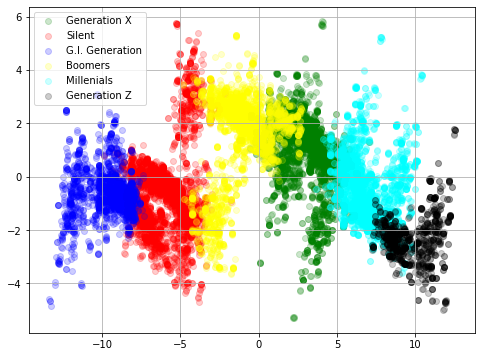

In [65]:
lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components = 2)
lda_model.fit(X_test, y_test)
X_lda = lda_model.transform(X_train)
plt.figure(figsize = (8, 6))
for i in range(len(generations)):
    plt.scatter(X_lda[y_train == generations[i], 0], X_lda[y_train == generations[i], 1], 
                color = colors[i], label = generations[i], alpha = 0.2)
plt.legend()
plt.grid()
pass

##**PCA**

In [66]:
from sklearn.decomposition import PCA

In [67]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_components

array([[-1.08114495,  0.96895916],
       [-1.07392932,  0.98062181],
       [-1.10033827,  0.94990493],
       ...,
       [-0.75104501,  0.66660611],
       [-0.78659231,  0.64288458],
       [-0.95556427,  0.5583368 ]])

In [68]:
pca_X = pd.DataFrame(data=principal_components,
                     columns = ['principal_component_1', 'principal_component_2'])
pca_X.head()

,principal_component_1,principal_component_2
0,-1.081145,0.968959
1,-1.073929,0.980622
2,-1.100338,0.949905
3,-1.161358,0.915833
4,-1.112269,0.938745


In [69]:
final_data = pd.concat([pca_X, y], axis=1)
final_data.head()

,principal_component_1,principal_component_2,generation
0,-1.081145,0.968959,Generation X
1,-1.073929,0.980622,Silent
2,-1.100338,0.949905,Generation X
3,-1.161358,0.915833,G.I. Generation
4,-1.112269,0.938745,Boomers


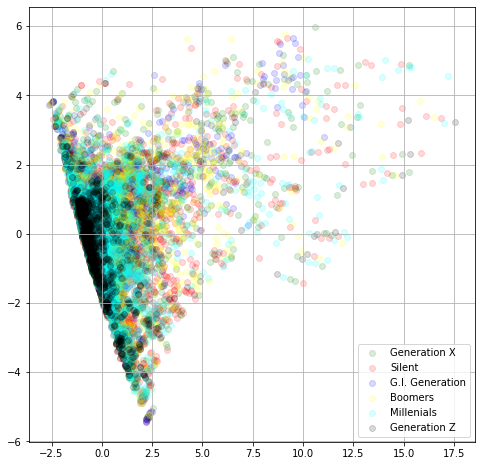

In [71]:
plt.figure(figsize = (8, 8))
for item in range(len(generations)):
  plt.scatter(final_data[final_data['generation'] == generations[item]]['principal_component_1'],
            final_data[final_data['generation'] ==  generations[item]]['principal_component_2'],
            alpha = 0.15,
            label =  generations[item],
            color = colors[item])
plt.legend()
plt.grid()
pass

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.3, random_state = 42)

print(X_train.shape[0], X_test.shape[0])

19191 8225


Возьмем вычисленное ранее best_n_neighbors и применим kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.6527538950549737 0.6955623100303951


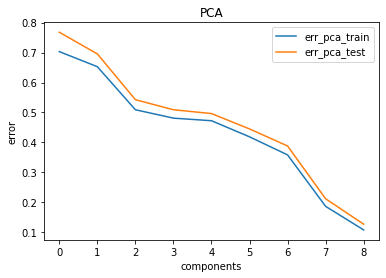

In [ ]:
comp = range(1, 10, 1)
err_pca_train = []
err_pca_test = []
for n in comp:
    pca = PCA(n_components=n)
    pca_X = pca.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.3, random_state = 42)
    
    knn = KNeighborsClassifier(n_neighbors = 50).fit(X_train, y_train)
    err_train = np.mean(y_train != knn.predict(X_train))
    err_test  = np.mean(y_test  != knn.predict(X_test))
    
    err_pca_train.append(err_train)
    err_pca_test.append(err_test)
plt.plot(err_pca_train, label='err_pca_train')
plt.plot(err_pca_test, label='err_pca_test')
plt.title('PCA')
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
pass

In [ ]:
print(err_pca_test.index(min(err_pca_test)), min(err_pca_test))

8 0.12693009118541032



Наибольшая точность для best_n_neighbors = 50 достигается при 8 главных компонентах. Ошибка на тестовых данных возросла на 0.0354, чем при использовании метода kNN на исходных данных.

При использовании LDA ошибка на тестовой выборке ухудшилась на 0.02. PCA показал себя не на много, но хуже.